In [1]:
# indo para diretório RAIZ
import os
os.chdir('../../')

In [2]:
# bibliotecas
from ds.src.fonte_dados import FonteDados
from ds.src.preprocessamento import Preprocessamento
from ds.src.visualizacao import Visualizacao

from ds.src.experimentos import Experimentos
from ds.src.treinamento_modelo import TreinamentoModelo
from ds.src.inferencia_modelo import InferenciaModelo

$$ $$
# Leitura dos dados
$$ $$

In [3]:
X_train, y_train = FonteDados().leitura_dados()

X_train.head()

Retorno treino (X e y) 

Dimensão X: (537, 8) 
Dimensão y: (537, 1) 



,num_gravid,glicose,pressao,espes_tricep,insulina,imc,hist_diab,idade
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [4]:
X_test, y_test = FonteDados().leitura_dados(treino=False)

y_test.head()

Retorno teste (X e y) 

Dimensão X: (231, 8) 
Dimensão y: (231, 1) 



,tem_diab
668,0
324,0
624,0
690,0
473,0


In [5]:
y_test.mean()

tem_diab    0.34632
dtype: float64

$$ $$
Acima vemos que se trata de um problema de classificação desbalanceado.

$$ $$
# Pré-processamento
$$ $$

In [6]:
pre_proc = Preprocessamento()
X_train_proc = pre_proc.processo(X_train)

Salvando tipos e nomes das colunas de treino 

Preenchimento dos missings das numéricas 

Normalização dos dados (mínimo e máximo) 



$$ $$
# Redução de dimensionalidade (visualização)
$$ $$

In [7]:
pca = pre_proc.reducao_dim(X_train_proc)
tsne = pre_proc.reducao_dim(X_train_proc, metodo='tsne')

print(pca.shape)

(537, 2)


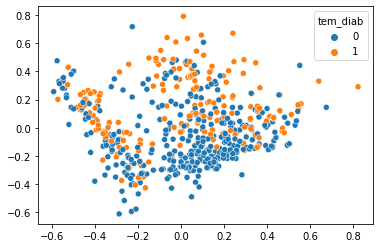

In [8]:
Visualizacao().pca(pca, y_train)

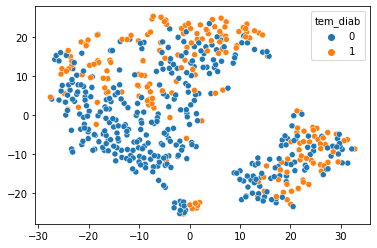

In [9]:
Visualizacao().pca(tsne, y_train)

$$ $$
# Balanceamento dos dados
$$ $$

Dimensões antes: ((537, 8), (537, 1))  |  Dimensões depois: ((698, 8), (698,))

Proporção target após balanceamento: 0.5



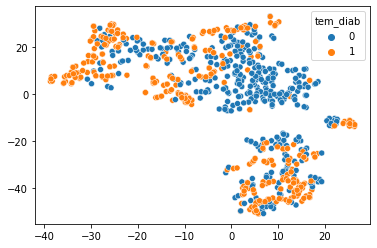

In [10]:
X_trainBalanc, y_trainBalanc = pre_proc.balanceamento_oversampling(X_train_proc, y_train)

print(f'\nProporção target após balanceamento: {y_trainBalanc.mean()}\n')

tsne = pre_proc.reducao_dim(X_trainBalanc, metodo='tsne')

Visualizacao().pca(tsne,
                   y_trainBalanc.rename('tem_diab').to_frame())

$$ $$
# Experimentos
$$ $$
Abaixo será executado do pipeline do processo de modelagem preditiva.
$$ $$

In [11]:
from ds.src.experimentos import Experimentos

exp = Experimentos()
metricas_modelos = exp.exec_experimentos()

Leitura dos dados 


Retorno treino (X e y) 

Dimensão X: (537, 8) 
Dimensão y: (537, 1) 

Retorno teste (X e y) 

Dimensão X: (231, 8) 
Dimensão y: (231, 1) 

Pré-processamento dados de treino 


Salvando tipos e nomes das colunas de treino 

Preenchimento dos missings das numéricas 

Normalização dos dados (mínimo e máximo) 

Pré-processamento dados de teste 


Preenchimento dos missings das numéricas 

Normalização dos dados (mínimo e máximo) 

Balanceamento Oversampling 


Dimensões antes: ((537, 8), (537, 1))  |  Dimensões depois: ((698, 8), (698,))
Treinamento dos modelos
Treinando o modelo  logistica
LogisticRegression() 


Treinando o modelo  knn
KNeighborsClassifier() 


Treinando o modelo  decision_tree
DecisionTreeClassifier() 


Treinando o modelo  random_forest
RandomForestClassifier() 


Treinando o modelo  svm
SVC() 


Treinando o modelo  adaboost
AdaBoostClassifier() 


Treinando o modelo  xgb
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
        

/home/carlos/Projetos/dev-python/igti/desafio/.venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Treinando o modelo  catboost


Treinando o modelo  mlp
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 10), solver='lbfgs') 




/home/carlos/Projetos/dev-python/igti/desafio/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Executando métricas

 logistica
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231
 


Matriz de confusão 
 [[106  45]
 [ 25  55]] 

 acuracia: 0.696969696969697, f1: 0.6111111111111112, recall: 0.6875



 knn
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       151
           1       0.56      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231
 


Matriz de confusão 
 [[106  45]
 [ 23  57]] 

 acuracia: 0.7056277056277056, f1: 0.6263736263736264, recall: 0.7125



 decision_tree
              precision    recall  f1-score   suppo

In [11]:
metricas_modelos

,acuracia,f1,recall
random_forest,0.75,0.66,0.71
svm,0.73,0.66,0.76
decision_tree,0.73,0.64,0.69
catboost,0.72,0.64,0.71
knn,0.71,0.63,0.71
xgb,0.71,0.62,0.68
mlp,0.71,0.62,0.69
logistica,0.70,0.61,0.69
adaboost,0.70,0.60,0.66


Random Forest foi o modelo campeão nos experimentos de acordo com a acurária.

$$ $$
# Preparando modelo final
$$ $$

In [12]:
modelo = TreinamentoModelo().treinamento_modelo()

Carregamento dos dados 


Retorno treino (X e y) 

Dimensão X: (537, 8) 
Dimensão y: (537, 1) 

Treinamento do pré-processamento 


Salvando tipos e nomes das colunas de treino 

Preenchimento dos missings das numéricas 

Normalização dos dados (mínimo e máximo) 

Balanceamento Oversampling 


Dimensões antes: ((537, 8), (537, 1))  |  Dimensões depois: ((698, 8), (698,))
Treinamento do modelo 


{'model_obj': RandomForestClassifier(), 'preprocess': <preprocessamento.Preprocessamento object at 0x7f8b3c0b8e10>, 'colunas':         colunas    tipos
0    num_gravid    int64
1       glicose    int64
2       pressao    int64
3  espes_tricep    int64
4      insulina    int64
5           imc  float64
6     hist_diab  float64
7         idade    int64}


$$ $$
# Inferência (submissão do teste)
$$ $$

In [13]:
inferencia = InferenciaModelo()
y_pred = inferencia.predicao()

Carregando o modelo 


Carregando dados 


Retorno teste (X e y) 

Dimensão X: (231, 8) 
Dimensão y: (231, 1) 

Pré-processamento 


Preenchimento dos missings das numéricas 

Normalização dos dados (mínimo e máximo) 

Predição 


Salvando arquivos 




In [14]:
inferencia.predito

,0
0,0
1,0
2,0
3,0
4,1
...,...
226,0
227,0
228,0
229,0


In [15]:
inferencia.modelo

{'model_obj': RandomForestClassifier(),
 'preprocess': <preprocessamento.Preprocessamento at 0x7f8b3615bad0>,
 'colunas':         colunas    tipos
 0    num_gravid    int64
 1       glicose    int64
 2       pressao    int64
 3  espes_tricep    int64
 4      insulina    int64
 5           imc  float64
 6     hist_diab  float64
 7         idade    int64}

In [16]:
y_pred.head()

,0
0,0
1,0
2,0
3,0
4,1


In [17]:
inferencia.dados_prever.head()

,num_gravid,glicose,pressao,espes_tricep,insulina,imc,hist_diab,idade
668,0.352941,0.492462,0.475410,0.523810,0.224586,0.506706,0.150299,0.366667
324,0.117647,0.562814,0.614754,0.507937,0.000000,0.532042,0.029889,0.000000
624,0.117647,0.542714,0.524590,0.000000,0.000000,0.459016,0.034159,0.000000
690,0.470588,0.537688,0.655738,0.000000,0.000000,0.366617,0.332195,0.216667
473,0.411765,0.683417,0.737705,0.000000,0.000000,0.445604,0.056362,0.483333
